In [9]:
import os
import pandas as pd
DATA_DIR = os.path.join(os.getenv('HOME'), 'DATA', 'Tonga_eruption_analysis')
wwllndatafile = os.path.join(DATA_DIR, 'A20220115.HungaTonga.loc')
df = pd.read_csv(wwllndatafile, names=['Date', 'Time', 'Latitude', 'Longitude', 'residual', 'Nsta'])

In [10]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'residual', 'Nsta'], dtype='object')

In [11]:
timestamp = []
from obspy import UTCDateTime
for i,row in df.iterrows():
    this_timestr = row['Date'].replace('/','-')+'T'
    this_timestamp = UTCDateTime(this_timestr + row['Time']).datetime
    timestamp.append(this_timestamp)

In [12]:
df['timestamp']=timestamp
import numpy as np
df['ones']=np.ones(len(df.Nsta))
df['cum_events']=np.cumsum(df['ones'])
df['cum_detections']=np.cumsum(df['Nsta'])

In [13]:
import matplotlib.pyplot as plt
ax1 = df.plot.scatter(x='timestamp',
                      y='cum_events',
                      c='DarkBlue', marker='.')
xtl = ax1.get_xticklabels()
plt.setp(xtl, rotation=45)

ValueError: scatter requires x column to be numeric

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

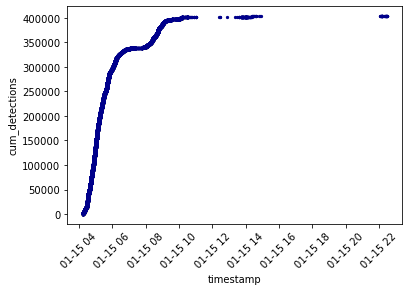

In [28]:
ax2 = df.plot.scatter(x='timestamp',
                      y='cum_detections',
                      c='DarkBlue', marker='.')
xtl = ax2.get_xticklabels()
plt.setp(xtl, rotation=45)

In [29]:
filtered_df = df.loc[(df['timestamp'] >= '2022-01-15T04:00:00')
                     & (df['timestamp'] < '2022-01-15T05:00:00')]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

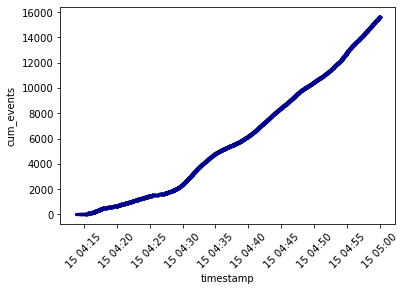

In [30]:
ax3 = filtered_df.plot.scatter(x='timestamp',
                      y='cum_events',
                      c='DarkBlue', marker='.')
xtl = ax3.get_xticklabels()
plt.setp(xtl, rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

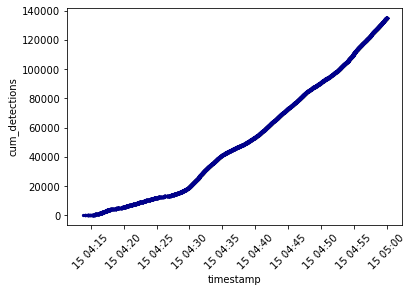

In [31]:
ax4 = filtered_df.plot.scatter(x='timestamp',
                      y='cum_detections',
                      c='DarkBlue', marker='.')
xtl = ax4.get_xticklabels()
plt.setp(xtl, rotation=45)